# 3. Modelling

Tasks to perform:

3.1. Build Models  
3.2. Evaluate Models  
3.3. Interpret best overall model

In [1]:
# import modules
import numpy as np
import pandas as pd

In [2]:
# read data
songs_df = pd.read_csv('Data/songs_final_3.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_title               2377 non-null   object 
 1   artist_name              2377 non-null   object 
 2   song_id                  2377 non-null   object 
 3   duration_ms              2377 non-null   int64  
 4   energy                   2377 non-null   float64
 5   key                      2377 non-null   int64  
 6   mode                     2377 non-null   int64  
 7   time_signature           2377 non-null   int64  
 8   acousticness             2377 non-null   float64
 9   danceability             2377 non-null   float64
 10  instrumentalness         2377 non-null   float64
 11  liveness                 2377 non-null   float64
 12  loudness                 2377 non-null   float64
 13  speechiness              2377 non-null   float64
 14  valence                 

In [3]:
songs_df.on_chart.value_counts()

0    1777
1     600
Name: on_chart, dtype: int64

In [6]:
exp_cols = [col for col in songs_df.columns if '_norm' in col and col !='days_since_release_norm']
exp_cols.extend([col for col in songs_df.columns if 'typ' in col])
exp_cols

['artist_followers_norm',
 'danceability_norm',
 'energy_norm',
 'loudness_norm',
 'speechiness_norm',
 'acousticness_norm',
 'instrumentalness_norm',
 'liveness_norm',
 'valence_norm',
 'tempo_norm',
 'duration_ms_norm',
 'mode_norm',
 'avg_acoustic_typ']

In [8]:
# select data
target = 'on_chart'

exclude_cols = ['artist_followers_norm', 'days_since_release_norm']
x_cols = exp_cols

model_cols = x_cols[:]
model_cols.append(target)

model_df = songs_df[model_cols]

X = model_df[x_cols]
y = model_df[target]
model_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_followers_norm  2377 non-null   float64
 1   danceability_norm      2377 non-null   float64
 2   energy_norm            2377 non-null   float64
 3   loudness_norm          2377 non-null   float64
 4   speechiness_norm       2377 non-null   float64
 5   acousticness_norm      2377 non-null   float64
 6   instrumentalness_norm  2377 non-null   float64
 7   liveness_norm          2377 non-null   float64
 8   valence_norm           2377 non-null   float64
 9   tempo_norm             2377 non-null   float64
 10  duration_ms_norm       2377 non-null   float64
 11  mode_norm              2377 non-null   float64
 12  avg_acoustic_typ       2377 non-null   float64
 13  on_chart               2377 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 260.1 KB


In [9]:
# check for collinearity
model_df.corr()

artist_followers_norm  danceability_norm  energy_norm  \
artist_followers_norm               1.000000           0.040424    -0.047145   
danceability_norm                   0.040424           1.000000     0.329158   
energy_norm                        -0.047145           0.329158     1.000000   
loudness_norm                       0.050756           0.600982     0.629680   
speechiness_norm                   -0.041302           0.265498     0.143338   
acousticness_norm                  -0.001830          -0.422404    -0.664879   
instrumentalness_norm              -0.215312          -0.510230    -0.168693   
liveness_norm                      -0.102635          -0.234244     0.286579   
valence_norm                        0.119921           0.682623     0.282540   
tempo_norm                          0.029167           0.274785     0.250215   
duration_ms_norm                    0.157391          -0.075092    -0.094135   
mode_norm                          -0.012107           0.022126    -0.044429   
avg_acoustic_typ                    0.151122           0.671033     0.325400   
on_chart                            0.432884           0.264146     0.258351   

                       loudness_norm  speechiness_norm  acousticness_norm  \
artist_followers_norm       0.050756         -0.041302          -0.001830   
danceability_norm           0.600982          0.265498          -0.422404   
energy_norm                 0.629680          0.143338          -0.664879   
loudness_norm               1.000000          0.131027          -0.576084   
speechiness_norm            0.131027          1.000000          -0.150664   
acousticness_norm          -0.576084         -0.150664           1.000000   
instrumentalness_norm      -0.485551         -0.178581           0.287446   
liveness_norm              -0.082762          0.098530          -0.053557   
valence_norm                0.468940          0.108143          -0.272786   
tempo_norm                  0.290373          0.138257          -0.198074   
duration_ms_norm           -0.038532         -0.145300           0.043544   
mode_norm                   0.044577         -0.077757           0.036690   
avg_acoustic_typ            0.687649          0.059273          -0.330685   
on_chart                    0.331177         -0.102406          -0.348743   

                       instrumentalness_norm  liveness_norm  valence_norm  \
artist_followers_norm              -0.215312      -0.102635      0.119921   
danceability_norm                  -0.510230      -0.234244      0.682623   
energy_norm                        -0.168693       0.286579      0.282540   
loudness_norm                      -0.485551      -0.082762      0.468940   
speechiness_norm                   -0.178581       0.098530      0.108143   
acousticness_norm                   0.287446      -0.053557     -0.272786   
instrumentalness_norm               1.000000       0.171306     -0.463796   
liveness_norm                       0.171306       1.000000     -0.193953   
valence_norm                       -0.463796      -0.193953      1.000000   
tempo_norm                         -0.158481      -0.121450      0.220885   
duration_ms_norm                    0.117336      -0.113506     -0.091589   
mode_norm                          -0.056430      -0.034416      0.086906   
avg_acoustic_typ                   -0.591511      -0.268703      0.605149   
on_chart                           -0.372717      -0.108495      0.286261   

                       tempo_norm  duration_ms_norm  mode_norm  \
artist_followers_norm    0.029167          0.157391  -0.012107   
danceability_norm        0.274785         -0.075092   0.022126   
energy_norm              0.250215         -0.094135  -0.044429   
loudness_norm            0.290373         -0.038532   0.044577   
speechiness_norm         0.138257         -0.145300  -0.077757   
acousticness_norm       -0.198074          0.043544   0.036690   
instrumentalness_norm   -0.158481          0.117

In [10]:
model_eval_dfs = []

In [11]:
# model construction
from pycaret.classification import *

# no resampling
clf_none = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            train_size=0.7)
        

In [12]:
top3_none = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [13]:
xgb_none = create_model('xgboost')
xgb_none = tune_model(xgb_none, optimize='F1')
xgb_none_metrics = pull()
xgb_none_df = xgb_none_metrics.iloc[10:11]
xgb_none_df[['model', 'resampling']] = ['xgb', 'none']
model_eval_dfs.append(xgb_none_df)
xgb_none_df

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC model resampling
Mean    0.8809  0.948  0.8532  0.7153  0.7758  0.6959  0.7031   xgb       none

In [14]:
lr_none = create_model('lr')
lr_none = tune_model(lr_none, optimize='F1')
lr_none_metrics = pull()
lr_none_df = lr_none_metrics.iloc[10:11]
lr_none_df[['model', 'resampling']] = ['lr', 'none']
model_eval_dfs.append(lr_none_df)
lr_none_df

Accuracy   AUC  Recall   Prec.     F1   Kappa     MCC model resampling
Mean    0.8713  0.93  0.7066  0.7506  0.726  0.6422  0.6442    lr       none

In [15]:
knn_none = create_model('knn')
knn_none = tune_model(knn_none, optimize='F1')
knn_none_metrics = pull()
knn_none_df = knn_none_metrics.iloc[10:11]
knn_none_df[['model', 'resampling']] = ['knn', 'none']
model_eval_dfs.append(knn_none_df)
knn_none_df

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC model resampling
Mean    0.8887  0.9314  0.6968  0.819  0.7492  0.6788  0.6849   knn       none

In [16]:
# oversampling with SMOTE
clf_over = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            train_size=0.7)

In [17]:
top3_over = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [18]:
xgb_over = create_model('xgboost')
xgb_over = tune_model(xgb_over, optimize='F1')
xgb_over_metrics = pull()
xgb_over_df = xgb_over_metrics.iloc[10:11]
xgb_over_df[['model', 'resampling']] = ['xgb', 'over']
model_eval_dfs.append(xgb_over_df)
xgb_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.8671  0.9436   0.878  0.6746  0.7612  0.6715  0.6845   xgb   

     resampling  
Mean       over

In [19]:
lr_over = create_model('lr')
lr_over = tune_model(lr_over, optimize='F1')
lr_over_metrics = pull()
lr_over_df = lr_over_metrics.iloc[10:11]
lr_over_df[['model', 'resampling']] = ['lr', 'over']
model_eval_dfs.append(lr_over_df)
lr_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.8473  0.9312  0.8684  0.6374  0.7326  0.6296  0.6472    lr   

     resampling  
Mean       over

In [20]:
knn_over = create_model('knn')
knn_over = tune_model(knn_over, optimize='F1')
knn_over_metrics = pull()
knn_over_df = knn_over_metrics.iloc[10:11]
knn_over_df[['model', 'resampling']] = ['knn', 'over']
model_eval_dfs.append(knn_over_df)
knn_over_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.8647  0.9334  0.8856  0.6671  0.7596  0.6682  0.6826   knn   

     resampling  
Mean       over

In [21]:
from imblearn.under_sampling import *
tomek_links1 = TomekLinks()

# undersampling with Tomek Links
clf_under = setup(data=model_df,
            target=target,
            session_id=42,
            ignore_low_variance=True,
            fix_imbalance=True,
            fix_imbalance_method=tomek_links1, 
            train_size=0.7)

In [22]:
top3_under = compare_models(include=['xgboost', 'lr', 'knn'], sort='F1')

In [23]:
xgb_under = create_model('xgboost')
xgb_under = tune_model(xgb_under, optimize='F1')
xgb_under_metrics = pull()
xgb_under_df = xgb_under_metrics.iloc[10:11]
xgb_under_df[['model', 'resampling']] = ['xgb', 'under']
model_eval_dfs.append(xgb_under_df)
xgb_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.8821  0.9444   0.878  0.7077  0.7825  0.7031  0.7119   xgb   

     resampling  
Mean      under

In [24]:
lr_under = create_model('lr')
lr_under = tune_model(lr_under, optimize='F1')
lr_under_metrics = pull()
lr_under_df = lr_under_metrics.iloc[10:11]
lr_under_df[['model', 'resampling']] = ['lr', 'under']
model_eval_dfs.append(lr_under_df)
lr_under_df

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC model  \
Mean    0.8671  0.9303  0.7389  0.7226  0.7281  0.6405  0.6426    lr   

     resampling  
Mean      under

In [25]:
knn_under = create_model('knn')
knn_under = tune_model(knn_under, optimize='F1')
knn_under_metrics = pull()
knn_under_df = knn_under_metrics.iloc[10:11]
knn_under_df[['model', 'resampling']] = ['knn', 'under']
model_eval_dfs.append(knn_under_df)
knn_under_df

Accuracy     AUC  Recall  Prec.     F1   Kappa     MCC model resampling
Mean    0.8809  0.9314  0.7315  0.769  0.746  0.6687  0.6718   knn      under

In [26]:
# combine evaluation metrics

model_metrics_df = pd.concat(model_eval_dfs)
model_metrics_df = model_metrics_df.sort_values(by='F1', ascending=False)
model_metrics_df.to_csv('Data/model_metrics.csv')

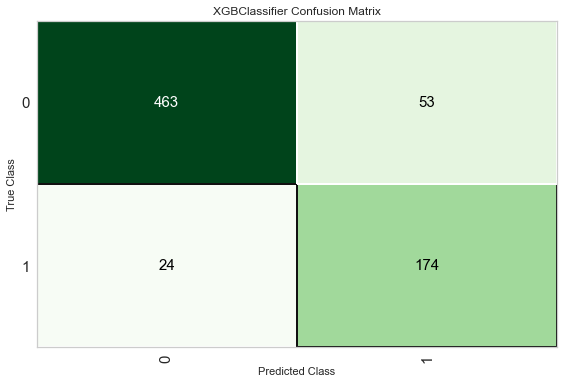

In [27]:
plot_model(xgb_under, 'confusion_matrix')

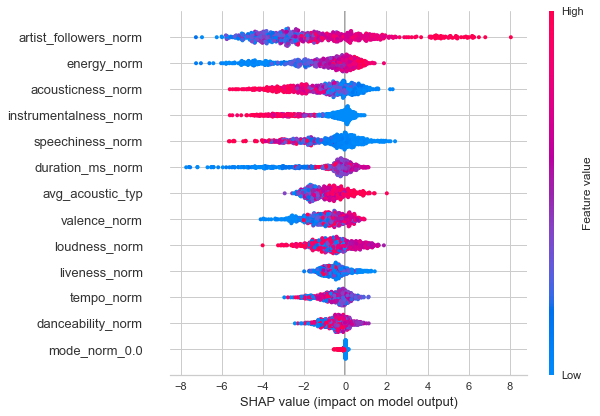

In [28]:
interpret_model(xgb_under)